#SCC - ICMC - USP
#**MBA EM INTELIGENCIA ARTIFICIAL E BIGDATA**
## **CURSO 2 - CD, AM E DM**
## **PROFA. ROSELI AP. FRANCELIN ROMERO**
---
## **Exemplo - DADOS DESBALANCEADOS - APLICAÇÃO DO MÉTODO SMOTE**
**OBJETIVO**:
## Mostrar que em muitas aplicações práticas, os dados podem estar desbalanceados.

## Sobre dataset: Será utilizado o dataset:
 **bank-additional.zip do diretorio de AM da UCI**
##Este dataset foi obtido em uma campanha de telemarketing, onde o modelo pode ser usado para prever o sucesso de chamadas de telemarketing e compreender os padrões existentes dentro do conjunto de dados.

In [ ]:
import pandas as pd

In [ ]:
# Os códigos a seguir realizam download dos dados e os descompactam para analise
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
!unzip bank-additional.zip

--2024-05-28 11:23:55--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘bank-additional.zip.1’

bank-additional.zip     [   <=>              ] 434.15K   673KB/s    in 0.6s    

2024-05-28 11:23:56 (673 KB/s) - ‘bank-additional.zip.1’ saved [444572]

Archive:  bank-additional.zip
replace bank-additional/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
# Leitura dos dados
dataset = pd.read_csv("bank-additional/bank-additional-full.csv",sep=";")
dataset

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


### Exploração de dados

In [ ]:
#verificar os tipos de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
# o pandas nao computa correlação para atributos categoricos. logo, precisamos selecionar as colunas numéricas antes de calcular a correlação
numericos = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
dataset_numerico = dataset[numericos]

In [ ]:
# Vamos também separar os atributos categóricos
categoricos = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
dataset_categorico = dataset[categoricos]


In [ ]:
#calculando os percentis
dataset_numerico.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

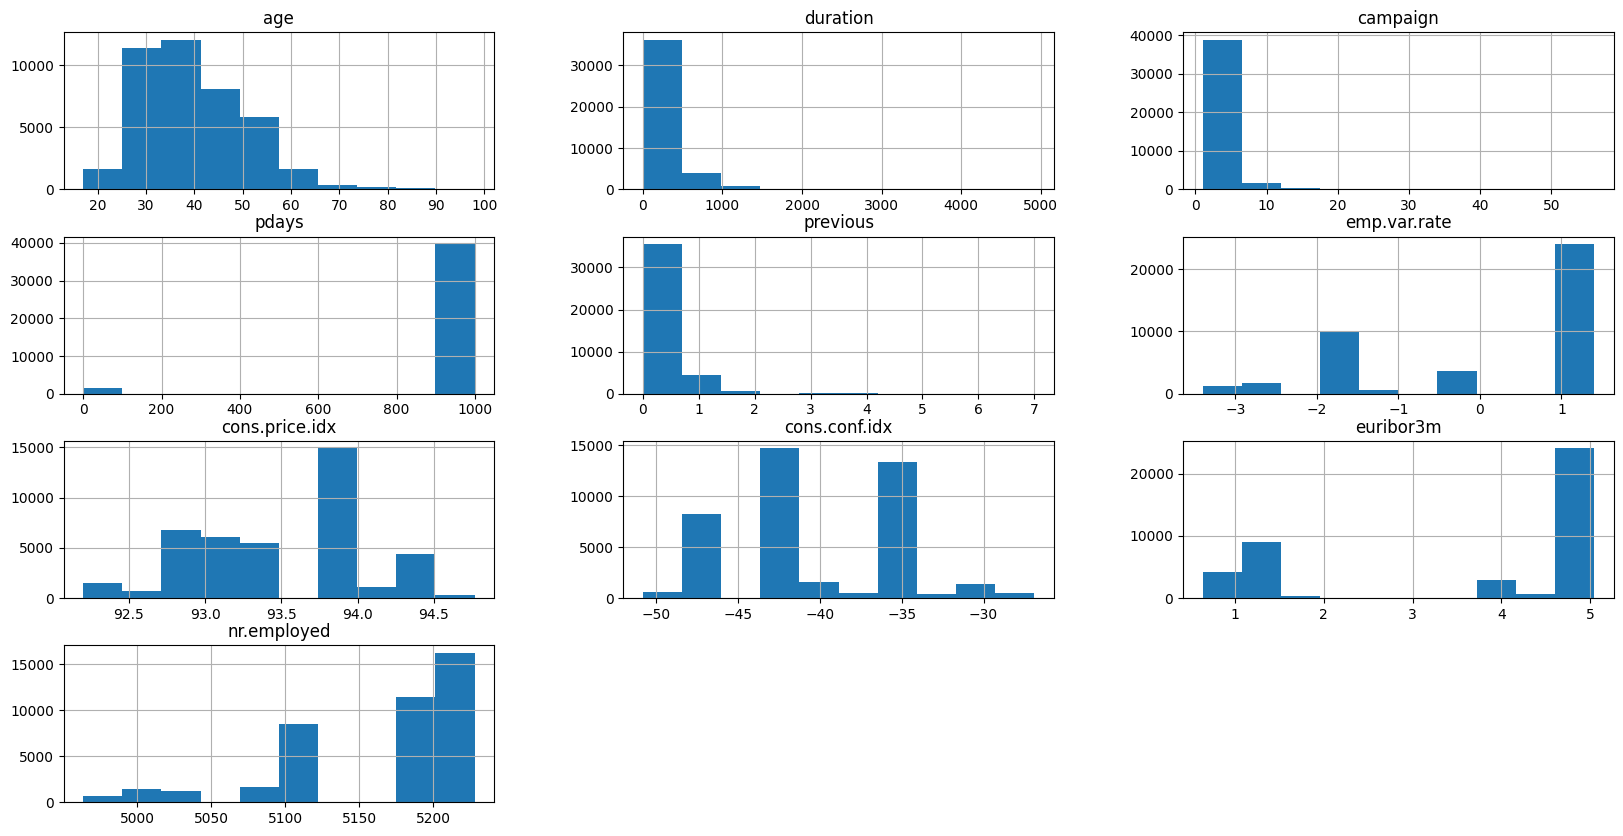

In [ ]:
#Montando um histograma dos atributos numericos para verificar a distribuição de cada um
dataset_numerico.hist(figsize=(20,10))

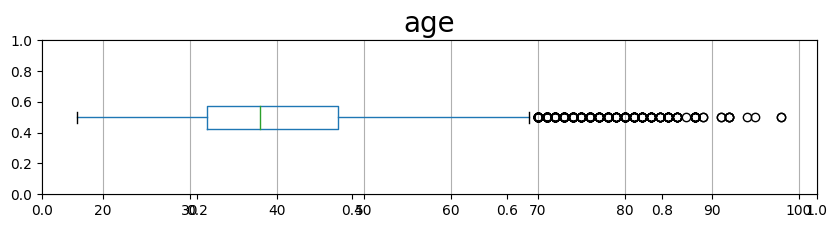

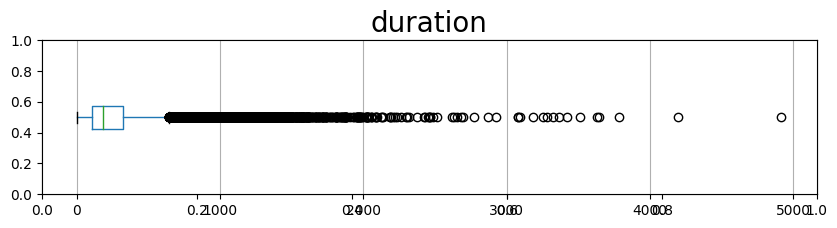

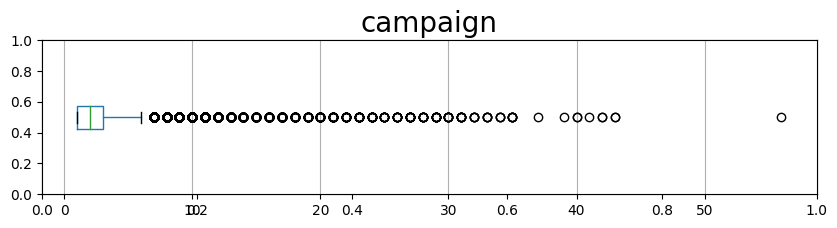

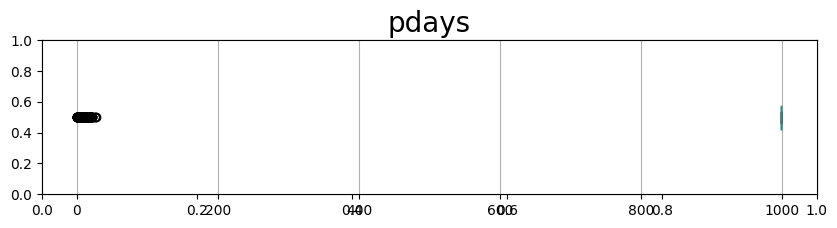

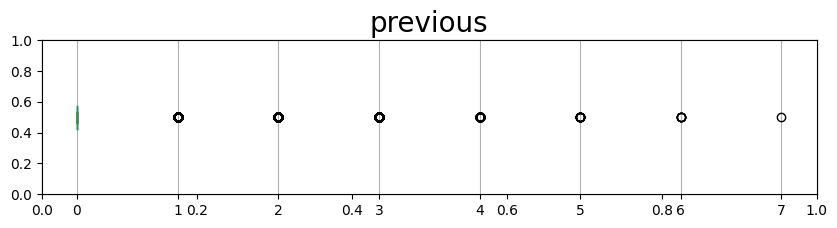

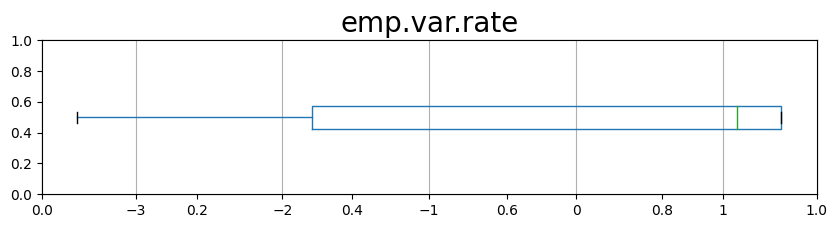

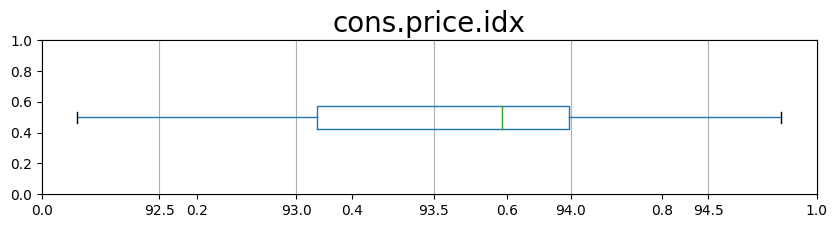

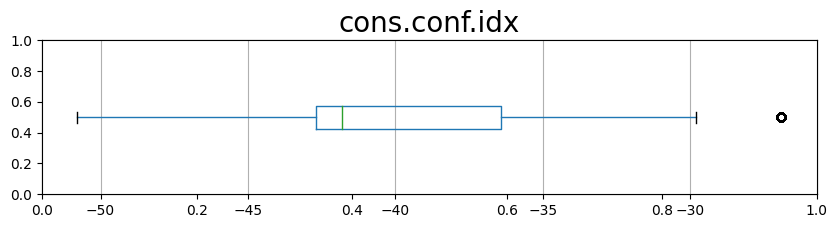

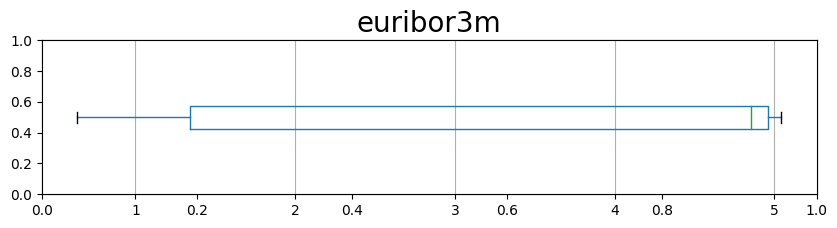

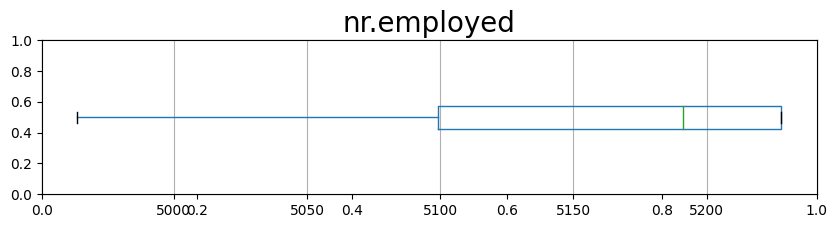

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

for index,data in enumerate(numericos): #["age","duration","campaign","pdays","previous","cons.price.idx","cons.conf.idx"]):

  plt.figure(index, figsize=(10,2))
  plt.title(data, fontsize=20)
  plt.axes().axes.get_yaxis().set_visible(False)
  dataset[[data]].boxplot(vert=False)
  plt.draw()


In [ ]:
#verificando quantos itens diferentes existem em cada atributo categorico
for index, data in enumerate(categoricos):
  print(data,":")
  print(dataset[data].unique())
  print("----------------------------")

job :
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
----------------------------
marital :
['married' 'single' 'divorced' 'unknown']
----------------------------
education :
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
----------------------------
default :
['no' 'unknown' 'yes']
----------------------------
housing :
['no' 'yes' 'unknown']
----------------------------
loan :
['no' 'yes' 'unknown']
----------------------------
contact :
['telephone' 'cellular']
----------------------------
month :
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
----------------------------
day_of_week :
['mon' 'tue' 'wed' 'thu' 'fri']
----------------------------
poutcome :
['nonexistent' 'failure' 'success']
----------------------------
y :
['no' 'yes']
----------------------------


In [ ]:
#Imprimindo a matriz de correlação (atributos numéricos)
dataset_numerico.corr().style.background_gradient(cmap='coolwarm')

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


In [ ]:
target_count= pd.value_counts(dataset["y"])

In [ ]:
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])

Class 0: 36548
Class 1: 4640


<Axes: >

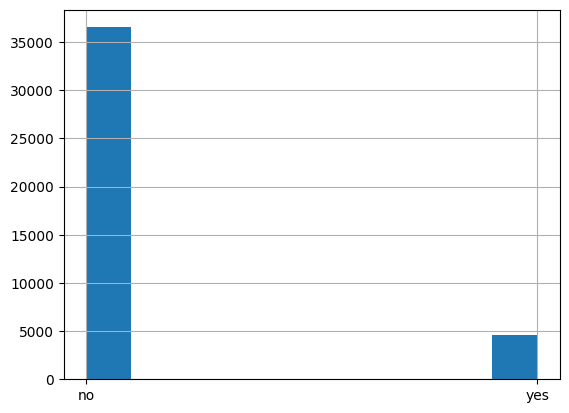

In [ ]:
# Exibindo o histograma das classes
dataset["y"].hist()

In [ ]:
# Separando os atributos preditivos no conjunto X e o atributo valor em y
labels = dataset.columns[:-1]
target = dataset.columns[-1]
X = dataset_numerico.values
y = dataset[target]

In [ ]:
# Codificando o atributo valor y em valores inteiros (usando o LabelEncoder)
from sklearn.preprocessing import LabelEncoder
y_novo= pd.DataFrame(y)
le = LabelEncoder()
y_novo = le.fit_transform(y_novo)
y_novo


array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
# BALANCEAMENTO DOS DADOS
# importar as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
# separando o conjunto em treinamento e validação
# separar variáveis entre X e y


# dividir o dataset entre treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y_novo, shuffle=True, test_size = 0.25)

# criando uma instância do SMOTE
smote = SMOTE(random_state=42)   #k=5 : numero de vizinhos mais proximos

# balanceando os dados
X_resampled, y_resampled = smote.fit_resample(X_train,y_train)


In [ ]:
#Imprimindo como as classes ou categorias ficaram balanceadas
print('Resampled dataset shape %s' % Counter(y_resampled))

Resampled dataset shape Counter({0: 27453, 1: 27453})
